__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?

Debemos tomar en cuenta que si una función $f(x)$ tiene definida su serie de potencias (Taylor)
$$f(x)=\sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n$$
entones si tenemos una matriz cuadrada,A, podemos definir a f(A) como
$$f(A)=\sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}A^n$$

Sabiendo de las operaciones que están bien definidas para una matriz son, la suma(siempre que sean de la misma dimensión), producto por un escalar, y multiplicación de matrices, debemos tomar en cuentas lo siguiente:

![Image](https://aga.frba.utn.edu.ar/wp-content/uploads/2016/09/condicion-para-poder-multiplicar-matrices.png)

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Una matriz simétrica se define como $$A^t=A$$ quiere decir que si la volvemos una matriz transpuesta nos dará la matriz original

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Lo que podemos hacer es diagonalizarla, si tenemos una matriz $A$ a la cual podamos obtener sus eigenvectores y eigenvalores. $$AP=PD$$ dónde $P$ es la matriz de  eigenvectores y la matriz $D$ es diagonal, dichos elementos son los eigenvalores.
Despuejando tendríamos que $$P^{-1}AP=D$$
Y la matriz D por ser diagonal, es simétrica.

Otra forma de obtener una matriz simétricas es que al tener una matriz cuadrada $A$ podemos descomponerla de la siguiente manera
$$A= \frac{1}{2}(A+A^T) + \frac{1}{2}(A-A^T) $$
teniendo una parte simétrica y otra antisimétrica
donde la matriz simétrica está dada por
$$A= \frac{1}{2}(A+A^T)$$

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.
* Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

__Nota 1:__ De momento no utilicen `expm`.

__Nota 2:__ El operador `*` funciona para multiplicar matrices.

__Note 3:__ Observen que la matriz $A$ no es simétrica, aqui no se cumple que $w^T=w^{-1}$.

In [1]:
#La matriz será:
A=[-1 1; -1 -1]

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [2]:
e_valores=eigvals(A)   #obtenemos los eigenvalores
e_vector=eigvecs(A)
m_diagonal=diagm(e_valores)   #Es la matriz con la diagonal con los eigenvalores

2×2 Array{Complex{Float64},2}:
 -1.0+1.0im   0.0+0.0im
  0.0+0.0im  -1.0-1.0im

In [3]:
#Tenemos que el propagador es:
eA(t)=e_vector*diagm(exp.(e_valores*t))*inv(e_vector)

eA (generic function with 1 method)

In [4]:
E(t,x0)=e_vector*diagm(exp.(e_valores*t))*inv(e_vector)*x0
#multiplicado por la condición inicial x0

E (generic function with 1 method)

In [5]:
using PyPlot

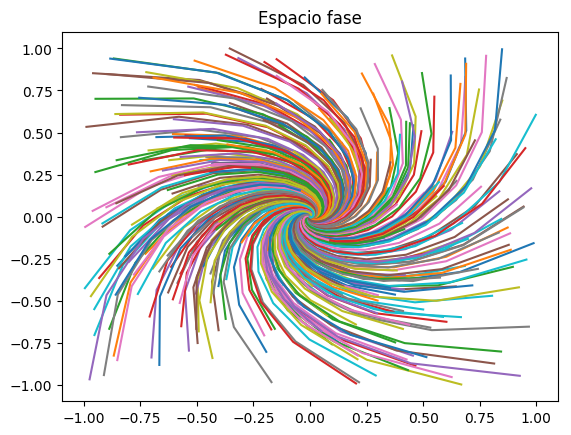

In [6]:
t=linspace(0,30,100) #El intervalo de tiempo
for i in 1:300       #Se emplearán 300 condicionesiniciales
    X=[]
    x0=[2*rand()-1,2*rand()-1]
    for k in 1:length(t)
        e=E(t[k],x0)   #Se evalua el propagador
        push!(X,e)
    end
    listx=map(x->x[1],real(X))  
    listv=map(x->x[2],real(X))
    plot(listx,listv)
end
title("Espacio fase")
;